In [1]:
# Set up and load data
# Includes
import sys
import os
import numpy as np
import json
import os


# Setup paths containing utility
curr_folder = os.getcwd()
sys.path.insert(0, os.path.join(curr_folder,'../app'))

# Utils imports for loading data
from utils import save_data, load_data, exists_datafolder
from utils import load_SQuAD_train, load_SQuAD_dev
from utils import get_foldername
from utils import merge_artfiles
from utils_EDAplots import plotbar_train_dev,plothist_train_dev

# Load the training data
arts_train = load_SQuAD_train()

# Load the testing data
arts_dev = load_SQuAD_dev()

# Merge train + dev together
Ntrain = len(arts_train)
Ndev = len(arts_dev)
print ("Narticles in train = " +  str(len(arts_train)))
print ("Narticles in dev = " +  str(len(arts_dev)))
arts = arts_train + arts_dev
Narticles = len(arts)

# Load blanks data (ground truth)
foldername = get_foldername('sq_pp_training')
arts3 = load_data('train.json',foldername) + load_data('dev.json',foldername)

# Make sure all titles match
all_title_pairs = [(a1['title'],a3['title']) for a1,a3 in zip(arts,arts3)]
titles_match_bool = [a1['title'] == a3['title'] for a1,a3 in zip(arts,arts3)]
print("Matching titles: {} \nTotal articles {}".format(sum(titles_match_bool),len(titles_match_bool)))

# Merge ground truth blanks with original data to get full dataset
from utils_SQuAD import merge_arts_paragraph_fields
list_of_fields = ['context_blanked','blank_classification']
arts = merge_arts_paragraph_fields(arts,arts3,list_of_fields)


Narticles in train = 442
Narticles in dev = 35
Matching titles: 477 
Total articles 477


In [2]:
# Import fig stuff
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics

In [3]:
# Take a subset of data
art = arts[:] #in this case, take everything

# Get ratio of blanks vs non-blanks in each article

For assesssing class imbalance

In [4]:
# art = arts[0:3]
# ID ratio of blanks to non-blanks
# cb

atot_words = []
atot_blanks = []
abw_ratio = []


for a in arts:
    # Total things up for each paragraph
    ptot_words = [len(p['blank_classification']) for p in a['paragraphs']] #Paragraph total words
    ptot_blanks = [sum(p['blank_classification']) for p in a['paragraphs']] #Paragraph total blanks
    
    # For articles
    atot_words.append(sum(ptot_words))
        # Total blanks per article
    atot_blanks.append(sum(ptot_blanks))
        # Ratio of blanks to words
    abw_ratio.append(sum(ptot_blanks)/sum(ptot_words)*100)

## Total words per article (including punctuation)

This means that individual punctuation marks will count as words (following AllenNLP's sentence splitting method)

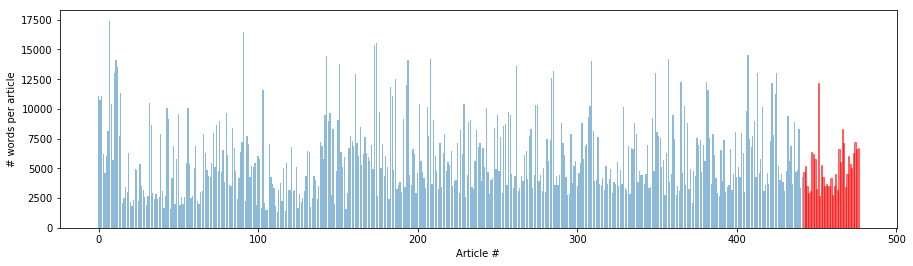

In [5]:

myvar = atot_words
varname = '# words'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

{'ax1': <matplotlib.axes._subplots.AxesSubplot at 0x7fa2c2d4b080>,
 'ax2': <matplotlib.axes._subplots.AxesSubplot at 0x7fa2c2c40ba8>}

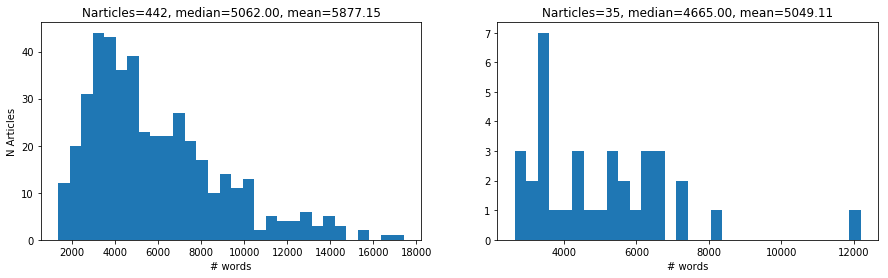

In [6]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

## Total blanks per article

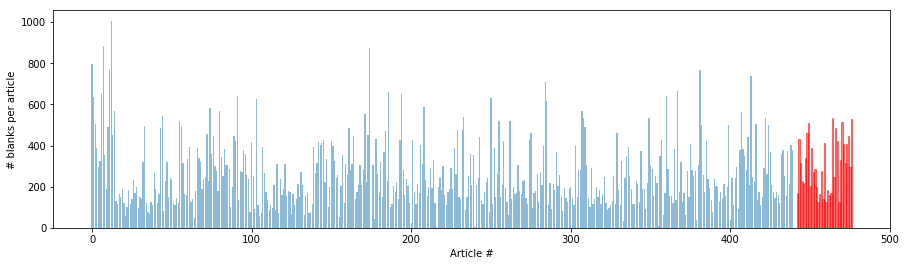

In [7]:

myvar = atot_blanks
varname = '# blanks'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

{'ax1': <matplotlib.axes._subplots.AxesSubplot at 0x7fa2c2839710>,
 'ax2': <matplotlib.axes._subplots.AxesSubplot at 0x7fa2c27ce748>}

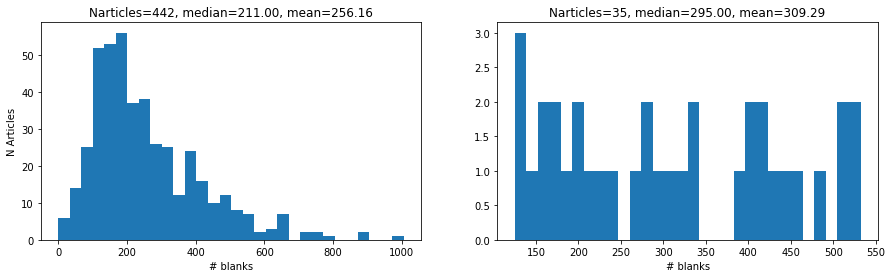

In [8]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

In [9]:
# In training set there are on average 256.16 blanks per article and 5877.15 words per article

256.16 / 5877.15
# About 0.04 blanks per word

0.04358575159728781

In [10]:
# Articles with zero blanks
abads = [i for i,atb in enumerate(atot_blanks) if atb == 0]
print(abads)

# These articles are probably all containing 

[175, 440, 441]

## Percentage of blanked words

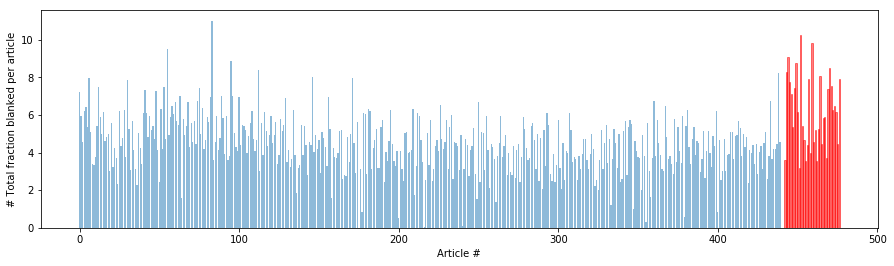

In [9]:

myvar = abw_ratio
varname = 'Percent blanked'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

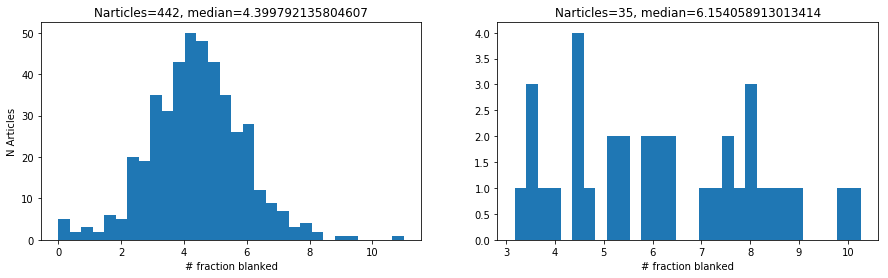

In [10]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

In [11]:
# All articles
Ntrain = len(arts_train)
Ndev = len(arts_dev)
print ("Narticles in train = " +  str(len(arts_train))) 
print ("Narticles in dev = " +  str(len(arts_dev))) 

Narticles in train = 442
Narticles in dev = 35


In [12]:
# Merge arts together
arts= arts_train + arts_dev
Narticles = len(arts)
print ("Narticles total = " +  str(len(arts))) 

Narticles total = 477


In [6]:
art[1]['title']

'Frédéric_Chopin'

In [11]:
art[1]['paragraphs'][1]['context_blanked']


'At the age of ______ he settled in ______ . Thereafter , during the last 18 years of his life , he gave only some ______ public performances , preferring the more intimate atmosphere of the salon . He supported himself by selling his compositions and teaching piano , for which he was in high demand . Chopin formed a friendship with ______ ______ and was admired by many of his musical contemporaries , including Robert Schumann . In ______ he obtained French citizenship . After a failed engagement to ______ ______ , from 1837 to 1847 he maintained an often troubled relationship with the French writer George Sand . A brief and unhappy visit to ______ with Sand in 1838–39 was one of his most productive periods of composition . In his last years , he was financially supported by his admirer ______ ______ , who also arranged for him to visit Scotland in 1848 . Through most of his life , Chopin suffered from poor health . He died in ______ in 1849 , probably of ______ .'

In [12]:
art[1]['paragraphs'][1]['context']

'At the age of 21 he settled in Paris. Thereafter, during the last 18 years of his life, he gave only some 30 public performances, preferring the more intimate atmosphere of the salon. He supported himself by selling his compositions and teaching piano, for which he was in high demand. Chopin formed a friendship with Franz Liszt and was admired by many of his musical contemporaries, including Robert Schumann. In 1835 he obtained French citizenship. After a failed engagement to Maria Wodzińska, from 1837 to 1847 he maintained an often troubled relationship with the French writer George Sand. A brief and unhappy visit to Majorca with Sand in 1838–39 was one of his most productive periods of composition. In his last years, he was financially supported by his admirer Jane Stirling, who also arranged for him to visit Scotland in 1848. Through most of his life, Chopin suffered from poor health. He died in Paris in 1849, probably of tuberculosis.'